# Отчет о проделанной работе

1. Уточнение: в принятых функциях hash_int, poly_hash m = p. Поэтому задача сводится к проверке что вероятность коллизий компизиционного хэша составляет O(L/p).
2. Уточнение под FPR понимается false positive rate - вероятность коллизий, т.е. FPR = FP / N, где FP - число коллизий, а N - общее число строк.
3. Вычисление композиционного хэша для строк - в ячейке 80.
4. Генерация строки - в ячейке 49.
5. Вычисление коллизий - в ячейке 134.
6. Общий цикл - в ячейке 135, 136.
7. Регрессионный график в ячейке 140 дает уверенное подтверждение целевой зависимости.
8. Размер стандартного отклонения задается параметром N2 в функции FPR в ячейке 134. Из-за завышенного значения числа выборок для поиска коллизий это отклонение невелико. В ячейке 149 нарисован график с планками погрешностей.

# Задание

Показать на эксперименте, что верхняя оценка 
на вероятность коллизии композиционного хеша для 
строк выполняется O(1/m + L/p). Подробнее в материалах лекции.

Построить графики зависимости FPR от длинны строк L и простого модуля p.
Эксперименты провести для L = np.linspace(10, 100, 11) и 10 простых чисел 
p из интервала (100, 1000)

Для каждой точки выполнить 10 экспериментов, на графике 
отобразить стандартное отклонение оценки в каждой точке.




In [10]:
import numpy as np

import random

from sklearn.metrics import accuracy_score

import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

SEED=42

In [80]:
def hash_int(x, a=112, b=22, p=997):
    return (a*x + b) % 997

def poly_hash(s, x=31, p=997):
    h = 0
    for j in range(len(s)-1, -1, -1):
        h = (h * x + ord(s[j]) + p) % p
    return h

def hash2(s, p=997):
    return hash_int(poly_hash(s, p=p), p=p)

In [125]:
L = np.linspace(10, 100, 11) 
P = [101, 131, 223, 311, 409, 593, 659, 769, 881, 997]
print(L)

[ 10.  19.  28.  37.  46.  55.  64.  73.  82.  91. 100.]


In [49]:
# Генерация строки длины n
def word(n):
    w = ''
    for i in range(n):
        w = w + chr(random.randint(65, 90))
    return w

print(word(5))

YYGPX


In [134]:
# Вычисление FPR

def FPR(l, p, N=5000):
    N2 = 10000
    fp = 0
    hh = [] # список хешей
    for i in range(N):
        w = word(l)
        h = hash2(w, p)
        hh.append(h)
    for i in range(N2):
        i1 = random.randint(0, N - 1)
        i2 = random.randint(0, N - 1)
        h1 = hh[i1]
        h2 = hh[i2]
        if h1 == h2:
            fp += 1
#        print(i, w, h, fp)
#    print(fp)
    return fp / N2

print(FPR(5, 10))


0.09705


In [135]:
i = 0
xx = []
yy = []
for l in L:
    l0 = int(l)
    for p in P:
        i += 1
        x1 = l0 / p
        fpr = FPR(l0, p)
        print(i, l0, p, x1, fpr)
        xx.append(x1)
        yy.append(fpr)

1 10 101 0.09900990099009901 0.00965
2 10 131 0.07633587786259542 0.0077
3 10 223 0.04484304932735426 0.00495
4 10 311 0.03215434083601286 0.0031
5 10 409 0.02444987775061125 0.0024
6 10 593 0.016863406408094434 0.0023
7 10 659 0.015174506828528073 0.00185
8 10 769 0.013003901170351105 0.00135
9 10 881 0.011350737797956867 0.0014
10 10 997 0.010030090270812437 0.00155
11 19 101 0.18811881188118812 0.0101
12 19 131 0.1450381679389313 0.0076
13 19 223 0.08520179372197309 0.0053
14 19 311 0.06109324758842444 0.0032
15 19 409 0.04645476772616137 0.0023
16 19 593 0.03204047217537943 0.0018
17 19 659 0.028831562974203338 0.0024
18 19 769 0.0247074122236671 0.0014
19 19 881 0.021566401816118047 0.00125
20 19 997 0.01905717151454363 0.00115
21 28 101 0.27722772277227725 0.01075
22 28 131 0.21374045801526717 0.00725
23 28 223 0.12556053811659193 0.0047
24 28 311 0.09003215434083602 0.0038
25 28 409 0.06845965770171149 0.0019
26 28 593 0.047217537942664416 0.00205
27 28 659 0.042488619119878605 

In [142]:
i = 0
xx = []
yy = []
yy_std = []
for l in L:
    l0 = int(l)
    for p in P:
        i += 1
        x1 = l0 / p
        
        y10 = []
        for k in range(10):
            fpr = FPR(l0, p)
            y10.append(fpr)
        fpr = np.mean(y10)
        std = np.std(y10)
        
        print(i, l0, p, x1, fpr, std)
        xx.append(x1)
        yy.append(fpr)
        yy_std.append(std)    
        

1 10 101 0.09900990099009901 0.010205 0.00038887658710701526
2 10 131 0.07633587786259542 0.007965000000000003 0.0004899234634103576
3 10 223 0.04484304932735426 0.004655 0.0005492950027080166
4 10 311 0.03215434083601286 0.0032649999999999997 0.00026081602711489955
5 10 409 0.02444987775061125 0.0027099999999999997 0.00031048349392520056
6 10 593 0.016863406408094434 0.0017399999999999998 0.00025573423705088844
7 10 659 0.015174506828528073 0.0018350000000000003 0.00018980252896102313
8 10 769 0.013003901170351105 0.0015249999999999999 0.00034441980198589045
9 10 881 0.011350737797956867 0.001405 0.00021615966321217287
10 10 997 0.010030090270812437 0.0012499999999999998 0.00018165902124584954
11 19 101 0.18811881188118812 0.010535 0.000430726131085635
12 19 131 0.1450381679389313 0.0076950000000000005 0.0005636710033343918
13 19 223 0.08520179372197309 0.0047 0.0004527692569068708
14 19 311 0.06109324758842444 0.0032299999999999994 0.00034438350715445133
15 19 409 0.04645476772616137

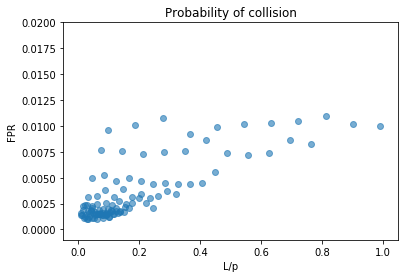

In [136]:
plt.xlabel('L/p')
plt.ylabel('FPR')
plt.title('Probability of collision')
plt.ylim(-0.001, 0.02)
plt.scatter(xx, yy, alpha=0.6);

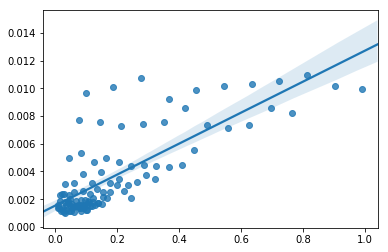

In [140]:
sns.regplot(xx, yy);

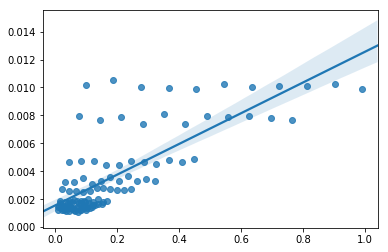

In [143]:
sns.regplot(xx, yy);

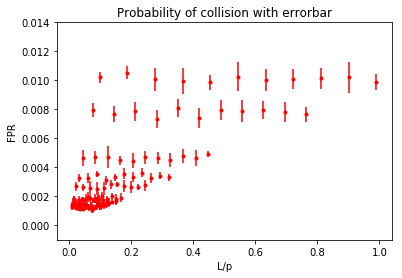

In [150]:
plt.xlabel('L/p')
plt.ylabel('FPR')
plt.title('Probability of collision with errorbar')
plt.ylim(-0.001, 0.014)
plt.errorbar(xx, yy, yerr=yy_std, fmt='.r');